In [8]:
%matplotlib inline
import d2lzh as d2l
import mxnet as mx
from mxnet import autograd, gluon, image, init, nd
from mxnet.gluon import data as gdata, loss as gloss, utils as gutils
import sys
import time

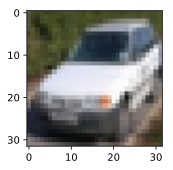

In [14]:
d2l.set_figsize()
img = image.imread('./data/train_tiny/47.png')
d2l.plt.imshow(img.asnumpy())

In [23]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j].asnumpy())
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27718a58>,
      dtype=object)

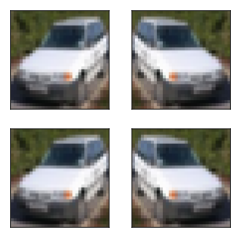

In [47]:
# Flipping
num_rows = 2
num_cols = 2
Y = [gdata.vision.transforms.RandomFlipLeftRight()(img) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27b6e898>,
      dtype=object)

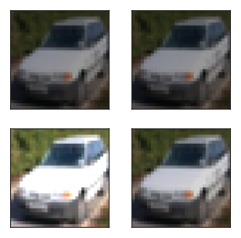

In [52]:
# Fading
num_rows = 2
num_cols = 2
Y = [gdata.vision.transforms.RandomBrightness(0.5)(img) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28261908>,
      dtype=object)

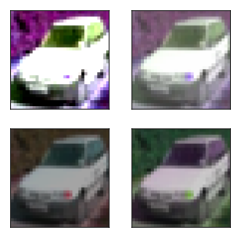

In [63]:
color_aug = gdata.vision.transforms.RandomColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)

num_rows = 2
num_cols = 2
Y = [color_aug(img) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a287a2978>,
      dtype=object)

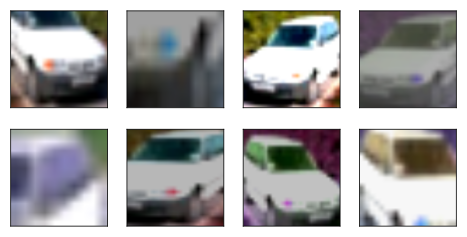

In [105]:
color_aug = gdata.vision.transforms.RandomColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
shape_aug = gdata.vision.transforms.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))

multi_operation = gdata.vision.transforms.Compose([
    gdata.vision.transforms.RandomFlipLeftRight(), color_aug, shape_aug])
num_rows = 2
num_cols = 4
Y = [multi_operation(img) for _ in range(num_rows * num_cols)]
show_images(Y, num_rows, num_cols)

In [112]:
multi_operation = gdata.vision.transforms.Compose([
    gdata.vision.transforms.ToTensor(),
    gdata.vision.transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
    ]
)
